In [1]:
import numpy as np
from scipy.stats import dirichlet, multinomial
from functools import reduce
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
np.random.seed(123)

In [2]:
from matplotlib import tri

In [3]:
corners = np.array([[0,0], [1,0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

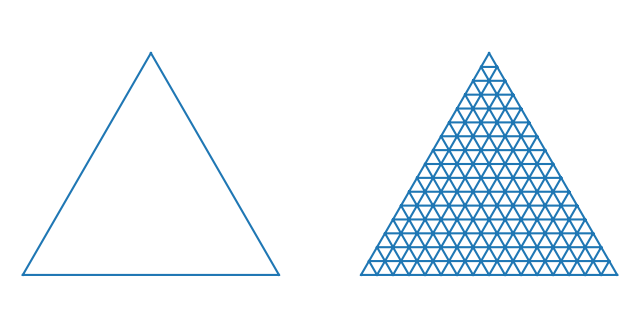

In [4]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for i, mesh in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

In [5]:
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

In [6]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])

In [7]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.show()

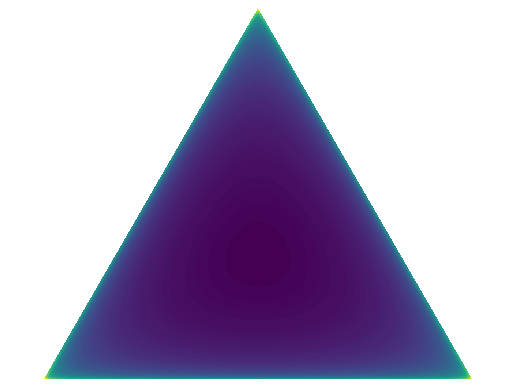

In [8]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

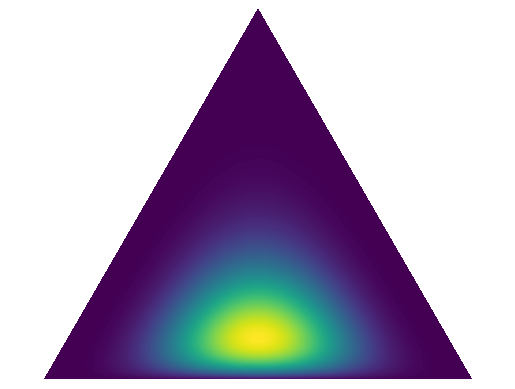

In [9]:
draw_pdf_contours(Dirichlet([5, 5, 2]))

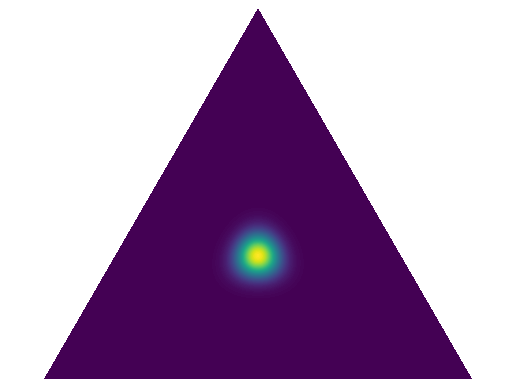

In [10]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

In [11]:
@interact(a1=(1,10), a2=(1,10), a3=(1,10), x1=(10,50,10), x2=(10,50,10), x3=(10,50,10))
def plot_posterior(a1, a2, a3, x1, x2, x3):
    data = [a1+x2, a2+x2, a3+x3]
    draw_pdf_contours(Dirichlet(data))

interactive(children=(IntSlider(value=5, description='a1', max=10, min=1), IntSlider(value=5, description='a2'…

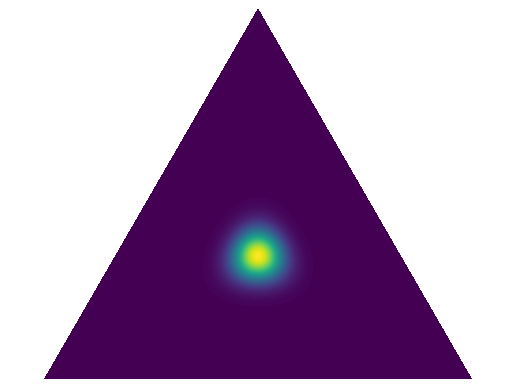

In [12]:
draw_pdf_contours(Dirichlet([35, 35, 35]))

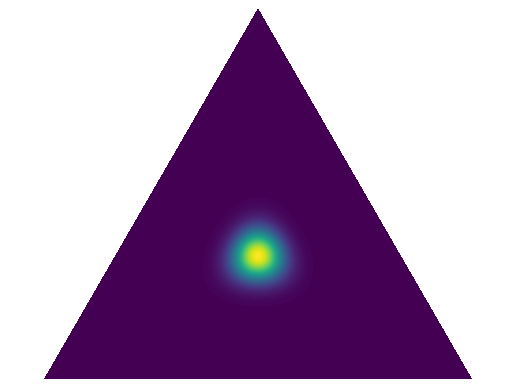

In [13]:
plot_posterior(5, 5, 5, 30, 30, 30)